# Andy Awlasewicz - Final Project
# Understanding Movie Streaming Data

In [85]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
streamdata = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')


In [4]:
imdbmovies = pd.read_csv('IMDB movies.csv', parse_dates = ['date_published'])


In [5]:
mychecks = pd.read_csv('checked.csv')


In [6]:
top250 = pd.read_csv('imdbs+top+250.csv')


In [7]:
imdbratings = pd.read_csv('IMDB ratings.csv')

In [9]:
streamdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [35]:
streamdata.shape

(16744, 16)

In [11]:
streamdata.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [20]:
streamdata.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
streamdata['Type'].value_counts()

0    16744
Name: Type, dtype: int64

In [19]:
streamdata.drop(columns=['Type'], inplace=True)

In [24]:
# Had originally just used a concatenate column but saw a good example of how to use apply that was similar so applied it here
# https://queirozf.com/entries/pandas-dataframes-apply-examples

def concat (title, year, director):
    return str(title) + '-' + str(year) + '-' + str(director)
streamdata['UniqueID'] = streamdata['Title','Year','Directors'].apply(lambda row: concatenate(row['Title'], row['Year'], row['Directors']), axis=1)


# streamdata['UniqueID'] = streamdata['Title'] + '-' + streamdata['Year'].astype(str) + '-' + streamdata['Directors']

In [25]:
streamdata.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,UniqueID
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Inception-2010-Christopher Nolan
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,"The Matrix-1999-Lana Wachowski,Lilly Wachowski"
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,"Avengers: Infinity War-2018-Anthony Russo,Joe ..."
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Back to the Future-1985-Robert Zemeckis
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,"The Good, the Bad and the Ugly-1966-Sergio Leone"


In [28]:
imdbmovies.shape

(85855, 22)

In [29]:
imdbmovies.head(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484,NaN,NaN,NaN,NaN,13.0,5.0
6,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,...,"Pola Negri, Emil Jannings, Harry Liedtke, Edua...","The story of Madame DuBarry, the mistress of L...",6.8,753,NaN,NaN,NaN,NaN,12.0,9.0
7,tt0002445,Quo Vadis?,Quo Vadis?,1913,1913-03-01,"Drama, History",120,Italy,Italian,Enrico Guazzoni,...,"Amleto Novelli, Gustavo Serena, Carlo Cattaneo...","An epic Italian film ""Quo Vadis"" influenced ma...",6.2,273,ITL 45000,NaN,NaN,NaN,7.0,5.0
8,tt0002452,Independenta Romaniei,Independenta Romaniei,1912,1912-09-01,"History, War",120,Romania,NaN,"Aristide Demetriade, Grigore Brezeanu",...,"Aristide Demetriade, Constanta Demetriade, Con...",The movie depicts the Romanian War of Independ...,6.7,198,ROL 400000,NaN,NaN,NaN,4.0,1.0
9,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane",...,"Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...,5.5,225,$ 30000,NaN,NaN,NaN,8.0,1.0


In [33]:
imdbmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [36]:
imdbmovies['UniqueID'] = imdbmovies['title'] + '-' + imdbmovies['year'].astype(str) + '-' + imdbmovies['director']

In [37]:
# https://www.geeksforgeeks.org/how-to-do-a-vlookup-in-python-using-pandas/
mergedata = pd.merge(left=streamdata, right=imdbmovies,  on='UniqueID', how='left')

In [39]:
mergedata.shape
#something is wrong because there is only supposed to be max 16.7k rows here... 
# duplicates in my imdbmovie dataset creating multiple hits?


(79180, 38)

In [43]:
mergedata.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'UniqueID', 'imdb_title_id', 'title',
       'original_title', 'year', 'date_published', 'genre', 'duration',
       'country', 'language', 'director', 'writer', 'production_company',
       'actors', 'description', 'avg_vote', 'votes', 'budget',
       'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [44]:
imdbmovies['UniqueID'].value_counts()

The Lost Jungle-1934-David Howard, Armand Schaefer       2
Anno Domini 681-1981-Ludmil Staikov                      2
Don Chisciotte-1933-Georg Wilhelm Pabst                  2
I violenti di Rio Bravo-1965-Robert Siodmak              2
Shadow of Chinatown-1936-Robert F. Hill                  2
                                                        ..
Ni luo he nu er-1987-Hsiao-Hsien Hou                     1
Zero Focus-1961-Yoshitarô Nomura                         1
Sadie-2018-Megan Griffiths                               1
Kim Bok-nam salinsageonui jeonmal-2010-Cheol-soo Jang    1
Topaz-1969-Alfred Hitchcock                              1
Name: UniqueID, Length: 85763, dtype: int64

In [48]:
imdbmovies[imdbmovies['UniqueID'] == 'The Lost Jungle-1934-David Howard, Armand Schaefer']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,UniqueID
1877,tt0025420,The Lost Jungle,The Lost Jungle,1934,1934-03-22,"Action, Adventure, Drama",243,USA,English,"David Howard, Armand Schaefer",...,Animal trainer Clyde Beatty heads a rescue par...,4.8,195,NaN,NaN,NaN,NaN,10.0,8.0,"The Lost Jungle-1934-David Howard, Armand Scha..."
1878,tt0025421,The Lost Jungle,The Lost Jungle,1934,1934-06-13,Adventure,68,USA,English,"David Howard, Armand Schaefer",...,"Feature version of the 1934 Mascot serial ""The...",4.1,161,NaN,NaN,NaN,NaN,11.0,2.0,"The Lost Jungle-1934-David Howard, Armand Scha..."


In [47]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
imdbmovies[imdbmovies.duplicated(subset=['UniqueID'])]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,UniqueID
1878,tt0025421,The Lost Jungle,The Lost Jungle,1934,1934-06-13,Adventure,68,USA,English,"David Howard, Armand Schaefer",...,"Feature version of the 1934 Mascot serial ""The...",4.1,161,NaN,NaN,NaN,NaN,11.0,2.0,"The Lost Jungle-1934-David Howard, Armand Scha..."
11148,tt0056173,La leggenda di Lobo,The Legend of Lobo,1962,1962-11-07,"Adventure, Family",67,USA,English,NaN,...,Tells the life story of a wolf named Lobo. He ...,7.0,441,NaN,NaN,NaN,NaN,7.0,NaN,NaN
12405,tt0059682,I violenti di Rio Bravo,Der Schatz der Azteken,1965,1967-03-30,"Adventure, Western",101,"West Germany, Italy, France",German,Robert Siodmak,...,"Dr. Karl Sternau, the personal physician of th...",5.4,470,NaN,NaN,NaN,NaN,2.0,4.0,I violenti di Rio Bravo-1965-Robert Siodmak
16288,tt0070754,Superman,Superman,1973,1973-09-09,"Action, Adventure, Sci-Fi",104,USA,English,NaN,...,"A compilation of four episodes of ""The Adventu...",6.5,181,NaN,NaN,NaN,NaN,4.0,NaN,NaN
23970,tt0095342,I Love N.Y.,I Love N.Y.,1987,1987-05-04,"Comedy, Drama",100,USA,English,NaN,...,Photographer Mario Cotone is hired to cover a ...,4.1,109,NaN,NaN,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83109,tt7731512,Code Blue the Movie,Code Blue the Movie,2018,2018-07-27,Drama,127,Japan,Japanese,NaN,...,The 'helicopter doctor' team is back with perf...,5.9,389,NaN,NaN,$ 78778562,NaN,2.0,1.0,NaN
83537,tt7980094,The Oscar Nominated Short Films 2018: Animation,The Oscar Nominated Short Films 2018: Animation,2018,2018-02-09,Animation,83,USA,English,NaN,...,An exclusive feature-length presentation showc...,7.5,161,NaN,NaN,NaN,NaN,1.0,7.0,NaN
83963,tt8236566,The Dip Run,The Dip Run,2018,2018-11-20,Comedy,96,USA,English,NaN,...,4 friends travel half way across the United St...,2.6,169,$ 150000,NaN,NaN,NaN,15.0,1.0,NaN
85083,tt9062580,Alone,Alone,2019,2019-05-20,"Adventure, Drama, Sci-Fi",69,USA,"English, Spanish, French, Italian",NaN,...,NaN,6.4,206,EUR 570000,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
len(imdbmovies[imdbmovies.UniqueID.isnull()])

87

In [53]:
len(streamdata[streamdata.UniqueID.isnull()])

726

In [ ]:
# Using Title - Year - Director as a unique identifier to join to IMDB may not be the most feasible

In [54]:
streamdata.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'UniqueID'],
      dtype='object')

In [55]:
netflixmask = streamdata['Netflix'] == 1
disneymask = streamdata['Disney+'] == 1
hulumask = streamdata['Hulu'] == 1
primemask = streamdata['Prime Video'] == 1

In [56]:
streamdata[netflixmask]['IMDb'].mean()

6.252963393375944

In [59]:
streamdata[disneymask]['IMDb'].mean()

6.441385435168739

In [58]:
streamdata[hulumask]['IMDb'].mean()

6.1381165919282505

In [57]:
streamdata[primemask]['IMDb'].mean()

5.770910312395029

In [60]:
services = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

In [61]:
barmeans = [streamdata[netflixmask]['IMDb'].mean(), streamdata[hulumask]['IMDb'].mean(), streamdata[primemask]['IMDb'].mean(), streamdata[disneymask]['IMDb'].mean() ]

In [62]:
barmeans

[6.252963393375944, 6.1381165919282505, 5.770910312395029, 6.441385435168739]

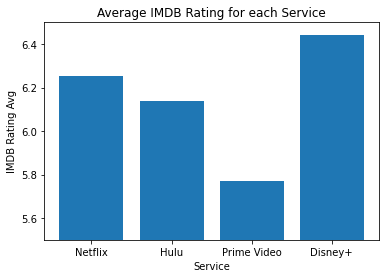

In [90]:
plt.bar(services, barmeans)
plt.xlabel('Service')
plt.ylabel('IMDB Rating Avg')
plt.title('Average IMDB Rating for each Service')
plt.ylim(5.5,6.5)

# https://stackoverflow.com/questions/23591254/python-pandas-matplotlib-annotating-labels-above-bar-chart-columns
# for i, label in enumerate(list(plt.index)):
#    score = df.ix[label]['Score']
#    ax.annotate(str(score), (i, score + 0.2))
    
plt.show()

In [ ]:
#streamdata.groupby(['year'])['movie_id'].count().plot(kind='bar')

In [68]:
streamcount = [len(streamdata[netflixmask]['ID']), len(streamdata[hulumask]['ID']), len(streamdata[primemask]['ID']), len(streamdata[disneymask]['ID']) ]

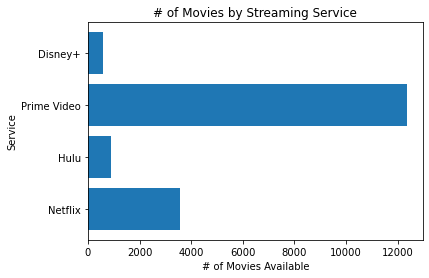

In [92]:
plt.barh(services, streamcount)
plt.ylabel('Service')
plt.xlabel('# of Movies Available')
plt.title('# of Movies by Streaming Service')
plt.show()

In [ ]:
# of movies 7.0 and up on average? 

In [78]:
streamdata[['Netflix','Hulu']]

,Netflix,Hulu
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
16739,0,0
16740,0,0
16741,0,0
16742,0,0


In [81]:
def platformct (netflix, hulu, prime, disney):
    return sum((int(netflix), int(hulu), int(prime)), int(disney))
streamdata['PlatformCount'] = streamdata[['Netflix','Hulu','Prime Video','Disney+']].apply(lambda row: platformct(row['Netflix'], row['Hulu'], row['Prime Video'], row['Disney+']), axis=1)

In [82]:
streamdata.head(10)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,UniqueID,PlatformCount
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Inception-2010-Christopher Nolan,1
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,"The Matrix-1999-Lana Wachowski,Lilly Wachowski",1
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,"Avengers: Infinity War-2018-Anthony Russo,Joe ...",1
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Back to the Future-1985-Robert Zemeckis,1
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,"The Good, the Bad and the Ugly-1966-Sergio Leone",2
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0,Spider-Man: Into the Spider-Verse-2018-Bob Per...,1
6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,The Pianist-2002-Roman Polanski,2
7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,Django Unchained-2012-Quentin Tarantino,1
8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,Raiders of the Lost Ark-1981-Steven Spielberg,1
9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0,Inglourious Basterds-2009-Quentin Tarantino,1


In [83]:
streamdata.PlatformCount.value_counts()

1    16117
2      617
3       10
Name: PlatformCount, dtype: int64

In [105]:
streamdata['IMDb'].astype(str)

0        8.8
1        8.7
2        8.5
3        8.5
4        8.8
        ... 
16739    6.2
16740    4.7
16741    5.7
16742    6.6
16743    nan
Name: IMDb, Length: 16744, dtype: object

In [112]:
def qualityrate(rating):
    if rating is None:
        return 0
    if rating >= 7.0:
        return 1
    else:
        return 0
streamdata['Quality'] = streamdata['IMDb'].apply(lambda row: qualityrate(row))
#streamdata['UniqueID'] = streamdata['Title','Year','Directors'].apply(lambda row: concatenate(row['Title'], row['Year'], row['Directors']), axis=1)

In [114]:
streamdata[streamdata['Quality']==0]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,UniqueID,PlatformCount,Quality
112,113,Extraction,2020,18+,6.8,68%,1,0,0,0,Sam Hargrave,"Action,Thriller",United States,"English,Hindi,Bengali",116.0,Extraction-2020-Sam Hargrave,1,0
122,123,Bolt,2008,7+,6.8,89%,1,0,0,1,"Byron Howard,Chris Williams","Animation,Adventure,Comedy,Drama,Family",United States,English,96.0,"Bolt-2008-Byron Howard,Chris Williams",2,0
136,137,Solo: A Star Wars Story,2018,13+,6.9,70%,1,0,0,0,Ron Howard,"Action,Adventure,Sci-Fi",United States,English,135.0,Solo: A Star Wars Story-2018-Ron Howard,1,0
149,150,Gerald's Game,2017,18+,6.6,90%,1,0,0,0,Mike Flanagan,"Drama,Horror,Thriller",United States,English,103.0,Gerald's Game-2017-Mike Flanagan,1,0
153,154,The Witch,2015,18+,6.9,90%,1,0,0,0,Robert Eggers,"Drama,Horror,Mystery","Canada,United States",English,92.0,The Witch-2015-Robert Eggers,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,The Ghosts of Buxley Hall-1980-Bruce Bilson,1,0
16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,The Poof Point-2001-Neal Israel,1,0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN,Sharks of Lost Island-2013-Neil Gelinas,1,0
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN,Man Among Cheetahs-2017-Richard Slater-Jones,1,0
